2. Implement A star Algorithm for any game search problem.

Enter the 5x5 maze row by row (0 = open, 1 = obstacle):


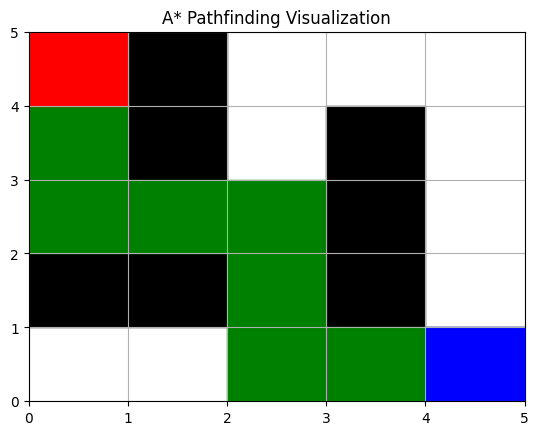

In [1]:
import heapq
import matplotlib.pyplot as plt
import numpy as np
import random

class Node:
    def __init__(self, position, parent=None, g=0, h=0):
        self.position = position
        self.parent = parent
        self.g = g
        self.h = h
        self.f = g + h

    def __lt__(self, other):
        return self.f < other.f

def heuristic(a, b):
    """Calculate Manhattan distance"""
    return abs(a[0] - b[0]) + abs(a[1] - b[1])

def astar(grid, start, goal):
    open_list = []
    closed_set = set()

    start_node = Node(start, None, 0, heuristic(start, goal))
    heapq.heappush(open_list, start_node)

    directions = [(0, 1), (1, 0), (0, -1), (-1, 0)]

    while open_list:
        current_node = heapq.heappop(open_list)

        if current_node.position == goal:
            path = []
            while current_node:
                path.append(current_node.position)
                current_node = current_node.parent
            return path[::-1]

        closed_set.add(current_node.position)

        for dx, dy in directions:
            neighbor_pos = (current_node.position[0] + dx, current_node.position[1] + dy)

            if (neighbor_pos[0] < 0 or neighbor_pos[0] >= len(grid) or 
                neighbor_pos[1] < 0 or neighbor_pos[1] >= len(grid[0]) or 
                grid[neighbor_pos[0]][neighbor_pos[1]] == 1 or 
                neighbor_pos in closed_set):
                continue

            g_cost = current_node.g + 1
            h_cost = heuristic(neighbor_pos, goal)
            new_node = Node(neighbor_pos, current_node, g_cost, h_cost)

            heapq.heappush(open_list, new_node)

    return None

def visualize_path(maze, path, start, goal):
    maze_array = np.array(maze)

    fig, ax = plt.subplots()
    ax.set_xticks(range(len(maze[0]) + 1))
    ax.set_yticks(range(len(maze) + 1))
    ax.grid(True)

    for row in range(len(maze)):
        for col in range(len(maze[0])):
            if maze[row][col] == 1:
                ax.add_patch(plt.Rectangle((col, len(maze) - row - 1), 1, 1, color='black'))

    if path:
        for row, col in path:
            ax.add_patch(plt.Rectangle((col, len(maze) - row - 1), 1, 1, color='green'))

    ax.add_patch(plt.Rectangle((start[1], len(maze) - start[0] - 1), 1, 1, color='red'))
    ax.add_patch(plt.Rectangle((goal[1], len(maze) - goal[0] - 1), 1, 1, color='blue'))

    plt.title("A* Pathfinding Visualization")
    plt.show()

def get_user_input():
    rows = int(input("Enter number of rows: "))
    cols = int(input("Enter number of columns: "))

    choice = input("Do you want to manually enter the maze? (y/n): ").strip().lower()

    if choice == 'y':
        print(f"Enter the {rows}x{cols} maze row by row (0 = open, 1 = obstacle):")
        maze = []
        for i in range(rows):
            row = list(map(int, input(f"Row {i+1}: ").split()))
            while len(row) != cols:
                print("Invalid row length, please re-enter.")
                row = list(map(int, input(f"Row {i+1}: ").split()))
            maze.append(row)
    else:
        density = float(input("Enter obstacle density (0 to 1): "))
        maze = [[1 if random.random() < density else 0 for _ in range(cols)] for _ in range(rows)]
        maze[0][0] = 0  # Ensure start position is open
        maze[rows-1][cols-1] = 0  # Ensure goal position is open

    start = tuple(map(int, input("Enter start position (row col): ").split()))
    goal = tuple(map(int, input("Enter goal position (row col): ").split()))

    return maze, start, goal

maze, start, goal = get_user_input()
path = astar(maze, start, goal)
visualize_path(maze, path, start, goal)


In [ ]:
Enter number of rows: 5
Enter number of columns: 5
Do you want to manually enter the maze? (y/n): y
Enter the 5x5 maze row by row (0 = open, 1 = obstacle):
Row 1: 0 1 0 0 0
Row 2: 0 1 0 1 0
Row 3: 0 0 0 1 0
Row 4: 1 1 0 1 0
Row 5: 0 0 0 0 0
Enter start position (row col): 0 0
Enter goal position (row col): 4 4


Input

5

5

y

0 1 0 0 0

0 1 0 1 0

0 0 0 1 0

1 1 0 1 0

0 0 0 0 0

0 0

4 4
________________________________________
Title: Implementation of A* Algorithm for Game Search Problem (Pathfinding in a Maze)
________________________________________
Theory:
A Search Algorithm (A-Star):*
The A* (A-Star) algorithm is one of the most widely used and efficient algorithms in artificial intelligence and game development for finding the shortest path between two points in a grid or graph. It combines the strengths of Dijkstra’s Algorithm and Greedy Best-First Search.
________________________________________
Key Concepts:
1. Heuristic Function (h(n)):
•	A heuristic estimates the cost from the current node to the goal node.
•	In this implementation, Manhattan Distance is used as the heuristic, defined as:
h(n)=∣x1−x2∣+∣y1−y2∣
2. Cost Function (g(n)):
•	Represents the cost from the start node to the current node.
3. Total Cost Function (f(n)):
•	f(n)=g(n)+h(n)
•	This determines the order in which nodes are visited.
________________________________________
Working of A Algorithm:*
1.	Initialize an open list (priority queue) and a closed list (visited set).
2.	Add the start node to the open list.
3.	While the open list is not empty:
o	Remove the node with the lowest f(n) value.
o	If the goal node is reached, reconstruct the path.
o	Else, explore its valid neighbors (not blocked or out of bounds).
o	Calculate g, h, and f for each neighbor and add to the open list if not visited.
4.	If the open list is empty and the goal is not reached, no path exists.
________________________________________
Grid Representation:
•	The maze is a 2D grid where:
o	0 = open cell (walkable)
o	1 = obstacle (not walkable)
•	Start and goal positions are provided by the user.
•	Maze can be generated randomly based on user-defined obstacle density.
________________________________________
Visualization:
•	The maze and the path found are visualized using Matplotlib.
o	Red: Start
o	Blue: Goal
o	Black: Obstacles
o	Green: Path
________________________________________
Applications of A Algorithm*:
•	Pathfinding in video games and simulations
•	Robot navigation
•	Network routing
•	Puzzle solving (like 8-puzzle, Sudoku)
•	GPS and map-based applications
________________________________________
Conclusion:
The A* algorithm is an optimal and complete pathfinding algorithm when an admissible heuristic is used. It balances between exploring shortest paths (like Dijkstra) and fast goal-driven search (like Greedy BFS), making it suitable for most real-time and offline path planning problems.
________________________________________